In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'test1',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 456 files belonging to 38 classes.


## Importing Libraries

### Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.h5')

In [4]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_20 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

### Visualising Single Image Of Test Data

In [5]:
%pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


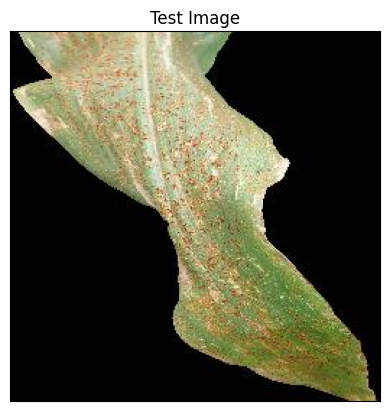

In [6]:
import cv2
image_path = "test/CornCommonRust3.JPG"
#Reading images
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB


#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

### Testing Model

In [7]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr,input_arr.shape)

[[[[  4.   4.   4.]
   [ 16.  17.  12.]
   [  9.  11.   0.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[  0.   0.   2.]
   [  0.   1.   0.]
   [ 16.  18.   7.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  [[ 10.   9.  14.]
   [  0.   0.   0.]
   [  1.   2.   0.]
   ...
   [  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]]

  ...

  [[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]
   ...
   [128. 123.  83.]
   [  4.   0.   0.]
   [  1.   0.   7.]]

  [[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]
   ...
   [180. 173. 121.]
   [  8.   0.   0.]
   [  4.   0.   7.]]

  [[  1.   1.   1.]
   [  1.   1.   1.]
   [  1.   1.   1.]
   ...
   [166. 157. 100.]
   [ 67.  58.  41.]
   [ 11.   0.   9.]]]] (1, 128, 128, 3)


In [8]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 6s 6s/step


(array([[3.0107736e-20, 2.9356643e-17, 3.8156123e-20, 2.3961631e-19,
         8.9226620e-16, 9.9992984e-19, 7.9347144e-22, 5.4795868e-17,
         1.0000000e+00, 4.1676736e-20, 1.9423606e-19, 7.8269500e-27,
         5.1219673e-20, 1.1370224e-25, 2.4749866e-22, 9.2769792e-21,
         8.4132647e-24, 8.7221045e-20, 1.0462901e-21, 3.9440831e-20,
         1.0056539e-15, 8.2574200e-27, 8.3969207e-22, 4.0033590e-24,
         1.8741342e-23, 4.6903027e-24, 5.5635974e-20, 1.7756980e-27,
         1.3531047e-24, 3.6875724e-18, 4.8166993e-10, 2.3492399e-22,
         3.7447390e-20, 7.2576343e-26, 1.4018211e-23, 1.5620006e-25,
         1.0507923e-24, 2.4858471e-16]], dtype=float32),
 (1, 38))

In [9]:
result_index = np.argmax(prediction)
result_index

8

In [18]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

### Displaying result of disease prediction

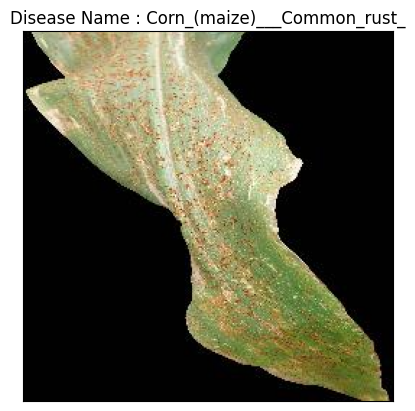

'Corn_(maize)___Common_rust_'

In [12]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name : {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
model_prediction

In [13]:
import sys
print(sys.executable)


c:\Users\ancha\.conda\envs\py310\python.exe


In [14]:
for batch in test_set.take(1):
    print("Image batch shape:", batch[0].shape)
    print("Label batch shape:", batch[1].shape)


Image batch shape: (32, 128, 128, 3)
Label batch shape: (32, 38)


In [15]:
val_loss, val_acc = model.evaluate(test_set)
print(f"Test Loss: {val_loss}")
print(f"Test Accuracy: {val_acc}")


15/15 [==============================] - 5s 132ms/step - loss: 0.1200 - accuracy: 0.9693
Test Loss: 0.11998400092124939
Test Accuracy: 0.969298243522644


In [16]:
# Load the saved training history from the JSON file
import json

with open('training_history.json', 'r') as f:
    loaded_history = json.load(f)

print("✅ Training history loaded.")
class TrainingHistory:
    def __init__(self, history):
        self.history = history

    def __getattr__(self, name):
        if name == 'history':
            return self.history
        else:
            raise AttributeError(f"'{self.__class__.__name__}' object has no attribute '{name}'")
training_history = TrainingHistory(loaded_history)

✅ Training history loaded.


15/15 [==============================] - 1s 43ms/step - loss: 0.1200 - accuracy: 0.9693
✅ Test Accuracy: 0.9693


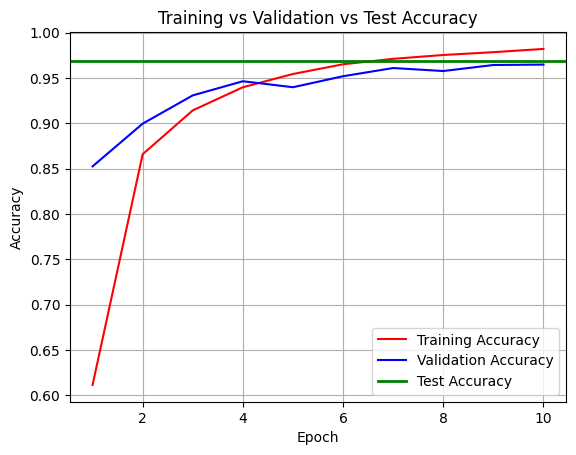

In [17]:
import matplotlib.pyplot as plt
import json

# Load training history
with open('training_history.json', 'r') as f:
    training_history = json.load(f)

epochs = list(range(1, len(training_history['accuracy']) + 1))

# Plot training and validation accuracy
plt.plot(epochs, training_history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history['val_accuracy'], color='blue', label='Validation Accuracy')

# Evaluate model on test set once
val_loss, test_acc = model.evaluate(test_set)
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Add test accuracy as a horizontal line
plt.axhline(y=test_acc, color='green', label='Test Accuracy', linewidth=2)

# Finalize plot
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation vs Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Found 456 files belonging to 38 classes.
1/1 [==============================] - 1s 1s/step


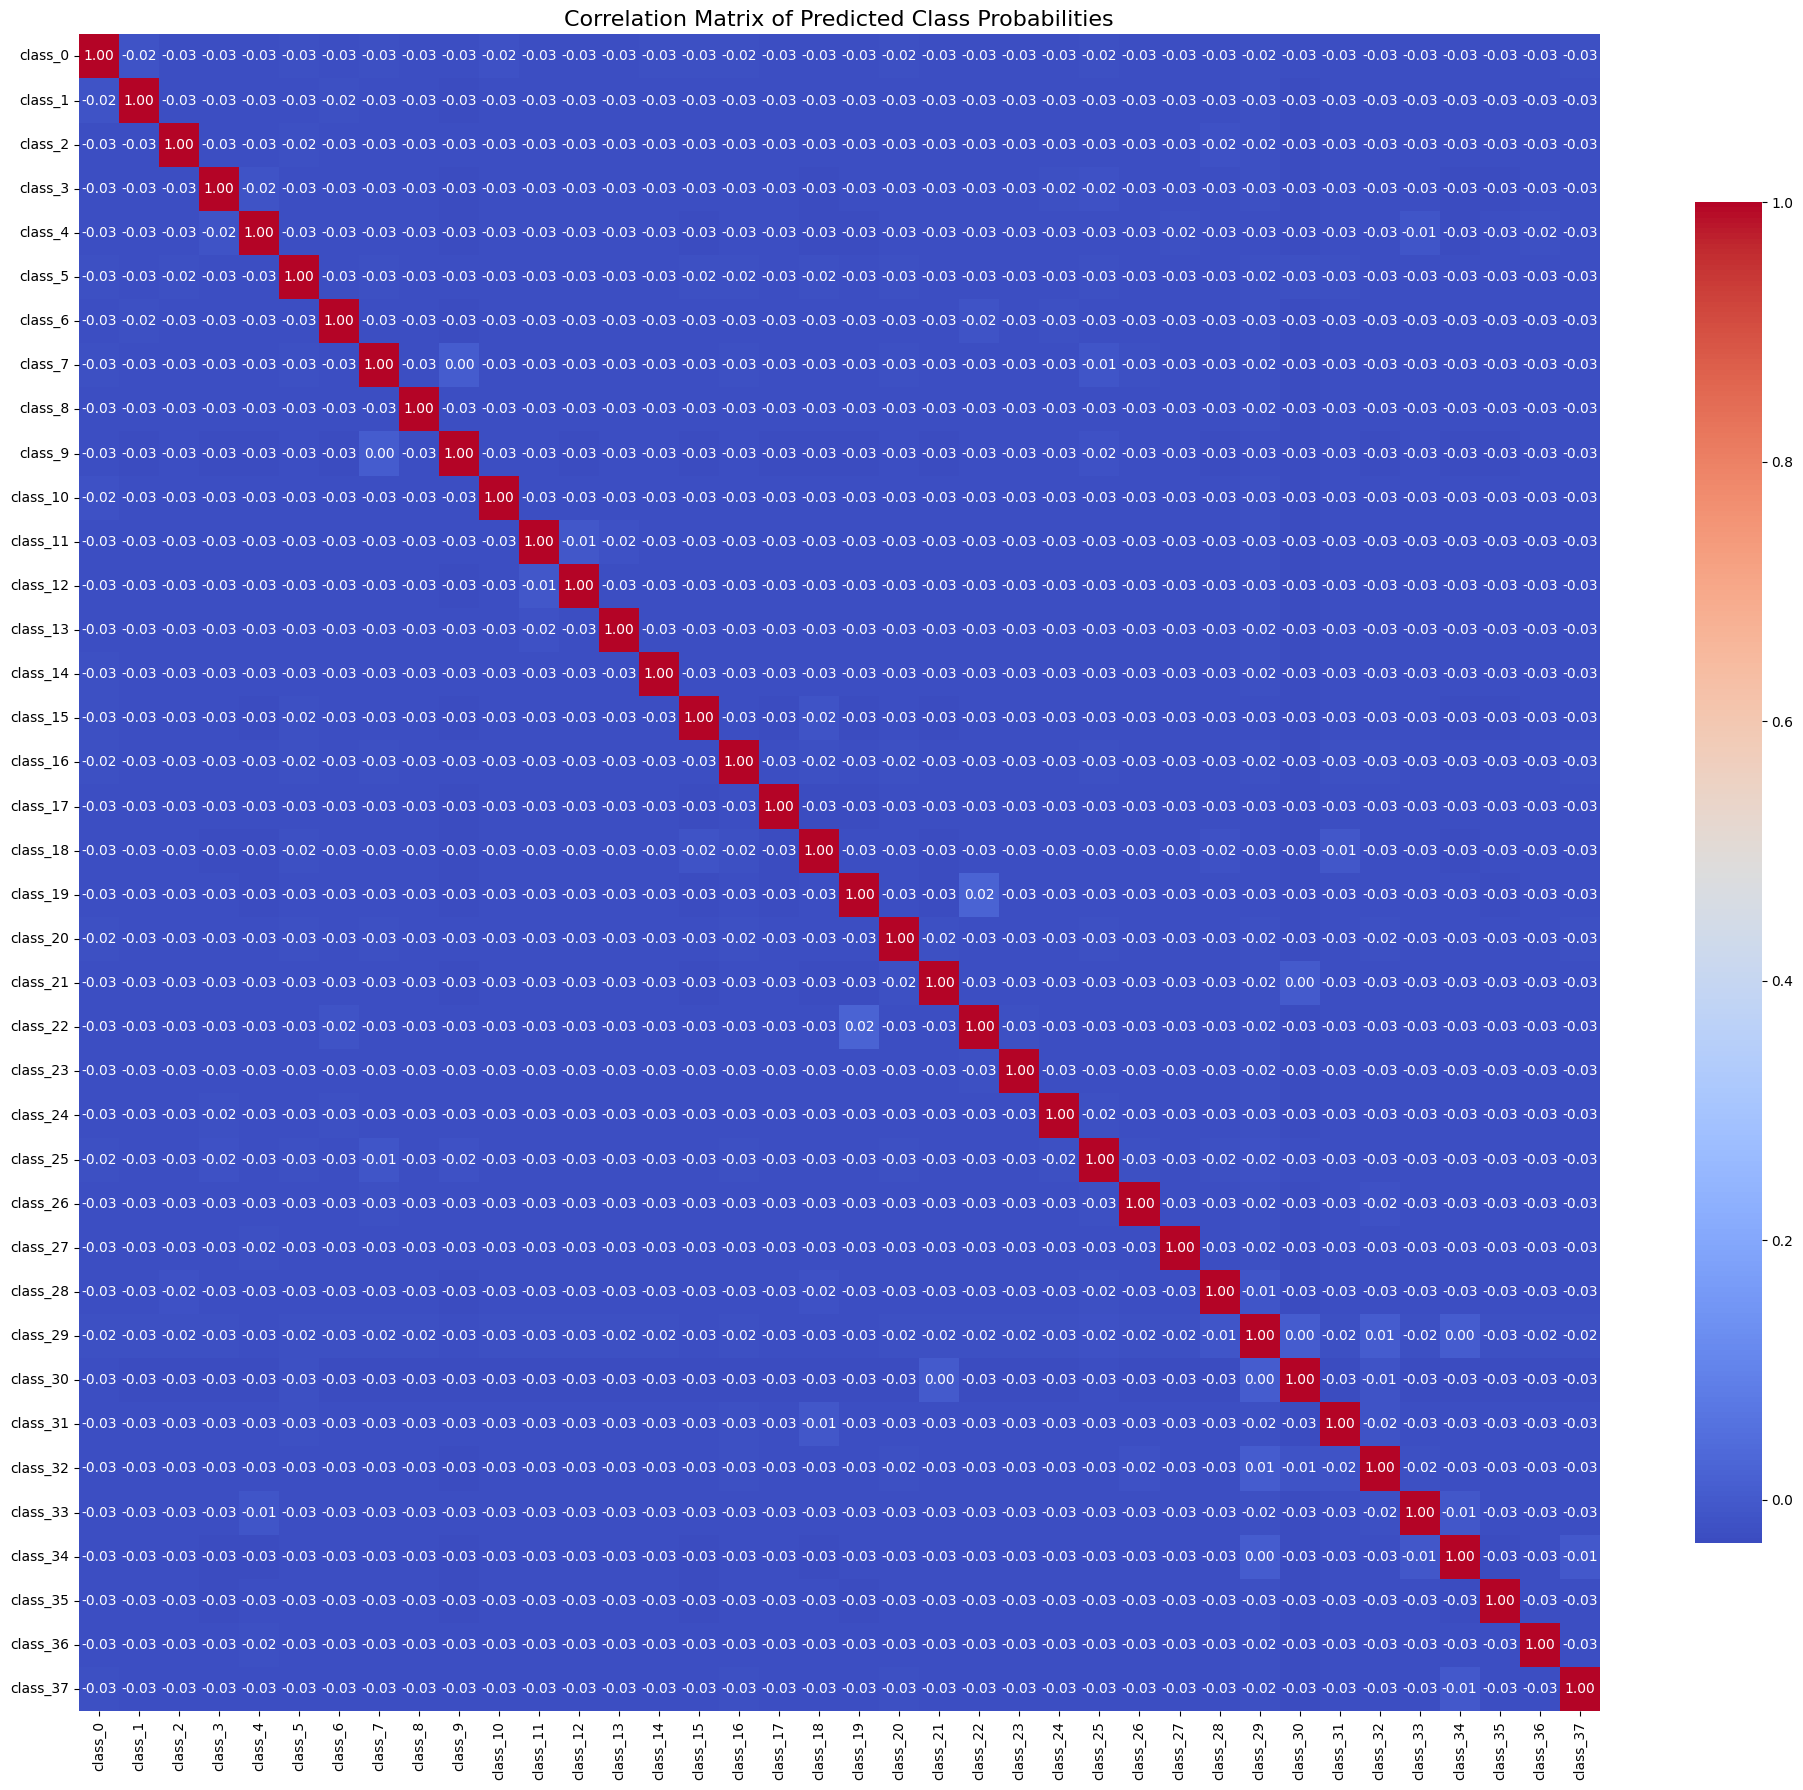

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Load your test dataset with label_mode='categorical' to match model's output
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'test1',
    image_size=(128, 128),
    batch_size=32,
    shuffle=False,
    label_mode='categorical'  # Important fix
)

# Load trained model
model = tf.keras.models.load_model('trained_model.h5')

# Get predictions and true labels
predictions = []
true_labels = []

for images, labels in test_dataset:
    preds = model.predict(images)
    predictions.append(preds)
    true_labels.append(labels.numpy())  # already one-hot encoded

# Stack all batches into single arrays
predictions = np.vstack(predictions)
true_labels = np.vstack(true_labels)  # Now this will work correctly

# Create a DataFrame of predicted probabilities for each class
df_preds = pd.DataFrame(predictions, columns=[f'class_{i}' for i in range(predictions.shape[1])])

# Compute correlation matrix of predicted probabilities
corr_matrix = df_preds.corr()

# Plot correlation heatmap
plt.figure(figsize=(20, 18))  # Increase figure size
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    annot_kws={'size': 10},  # Increase font size of annotations
    cbar_kws={'shrink': 0.8}  # Optional: shrink color bar
)
plt.xticks(rotation=90)  # Rotate x labels for better spacing
plt.yticks(rotation=0)   # Keep y labels horizontal
plt.title('Correlation Matrix of Predicted Class Probabilities', fontsize=16)
plt.tight_layout()
plt.show()



conv2d_17
conv2d_18
max_pooling2d_8
conv2d_19
conv2d_20
max_pooling2d_9
conv2d_21
conv2d_22
max_pooling2d_10
conv2d_23
conv2d_24
max_pooling2d_11
conv2d_25
conv2d_26
max_pooling2d_12
dropout
flatten_1
dense_2
dropout_1
dense_3
1/1 [==============================] - 0s 128ms/step
Feature maps shape: (1, 128, 128, 32)


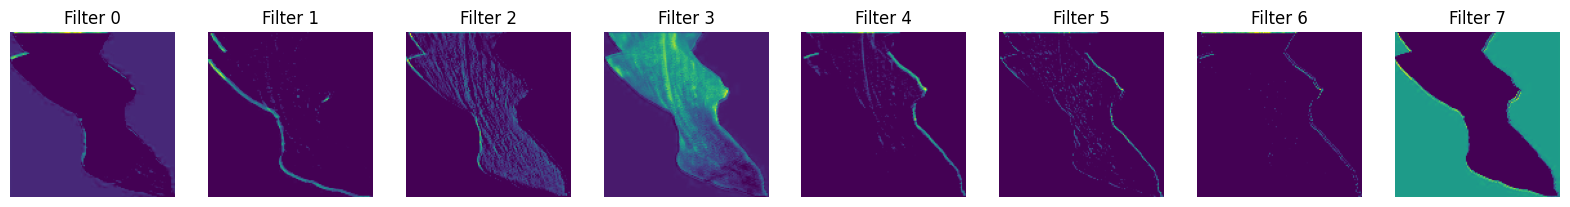

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_intermediate_layer_model(model, layer_name):
    return tf.keras.Model(inputs=model.input,
                          outputs=model.get_layer(layer_name).output)

# Replace with your loaded or created model
# model = ...

# Print all layer names to find the exact layer name
for layer in model.layers:
    print(layer.name)

layer_name = 'conv2d_17'  # change to your desired layer name

intermediate_model = get_intermediate_layer_model(model, layer_name)

# Prepare your input image of shape (1, height, width, channels)
# input_img = ...

feature_maps = intermediate_model.predict(input_img)

print(f"Feature maps shape: {feature_maps.shape}")

# Visualize first 8 feature maps
fig, axes = plt.subplots(1, 8, figsize=(20, 5))
for i in range(8):
    axes[i].imshow(feature_maps[0, :, :, i], cmap='viridis')
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i}')
plt.show()


In [9]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.__class__.__name__)


0 conv2d_17 Conv2D
1 conv2d_18 Conv2D
2 max_pooling2d_8 MaxPooling2D
3 conv2d_19 Conv2D
4 conv2d_20 Conv2D
5 max_pooling2d_9 MaxPooling2D
6 conv2d_21 Conv2D
7 conv2d_22 Conv2D
8 max_pooling2d_10 MaxPooling2D
9 conv2d_23 Conv2D
10 conv2d_24 Conv2D
11 max_pooling2d_11 MaxPooling2D
12 conv2d_25 Conv2D
13 conv2d_26 Conv2D
14 max_pooling2d_12 MaxPooling2D
15 dropout Dropout
16 flatten_1 Flatten
17 dense_2 Dense
18 dropout_1 Dropout
19 dense_3 Dense


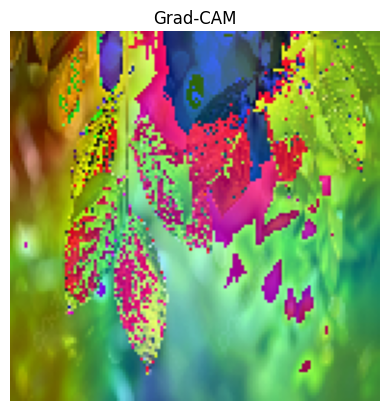

In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

# === Function to load and preprocess image ===
def get_img_array(img_path, size):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=size)
    array = tf.keras.preprocessing.image.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    array = array / 255.0  # normalize
    return array

# === Function to make Grad-CAM heatmap ===
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# === Function to display image and heatmap overlay ===
def display_gradcam(img_path, heatmap, alpha=0.4):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))  # ensure size match
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = heatmap_colored * alpha + img
    plt.imshow(cv2.cvtColor(superimposed_img.astype('uint8'), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Grad-CAM')
    plt.show()

# === Parameters ===
img_path = "leaf image.jpg"  # Replace with the correct path
img_size = (128, 128)
last_conv_layer_name = 'conv2d_26'  # Check model.summary() to confirm

# === Load and process image ===
img_array = get_img_array(img_path, img_size)

# === Make Grad-CAM heatmap ===
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

# === Display overlay ===
display_gradcam(img_path, heatmap)


In [23]:
import numpy as np

# Get model predictions and true labels
predictions = []
true_labels = []

for images, labels in test_dataset:
    preds = model.predict(images)
    predictions.append(preds)
    true_labels.append(labels.numpy())

# Stack all batches
y_score = np.vstack(predictions)
y_test_onehot = np.vstack(true_labels)

# Convert one-hot labels to class indices for ROC AUC calculation
y_test = np.argmax(y_test_onehot, axis=1)


1/1 [==============================] - 0s 39ms/step


C:\Users\ancha\AppData\Local\Temp\ipykernel_3596\3495523905.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', n_classes)


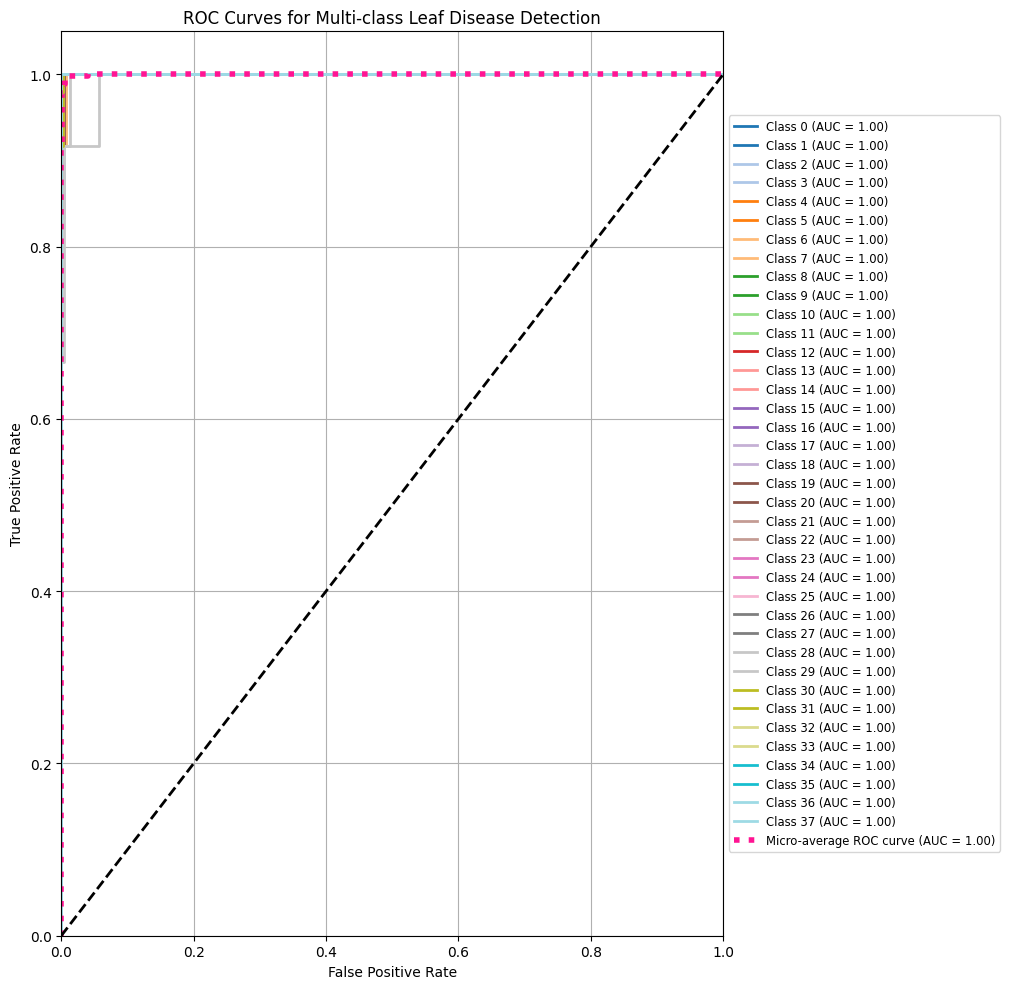

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Assume these are defined somewhere before:
# y_score: numpy array with predicted probabilities, shape = (num_samples, num_classes)
# y_test_onehot: numpy array with one-hot encoded true labels, shape = (num_samples, num_classes)

# Convert one-hot true labels to class indices
y_test = np.argmax(y_test_onehot, axis=1)
n_classes = y_score.shape[1]

# Binarize the true labels (just in case)
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot all ROC curves
plt.figure(figsize=(12, 10))
colors = plt.cm.get_cmap('tab20', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (AUC = {roc_auc["micro"]:0.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multi-class Leaf Disease Detection')
plt.grid(True)

# Legend outside on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=1)

# Adjust layout so legend fits on right without squeezing the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()


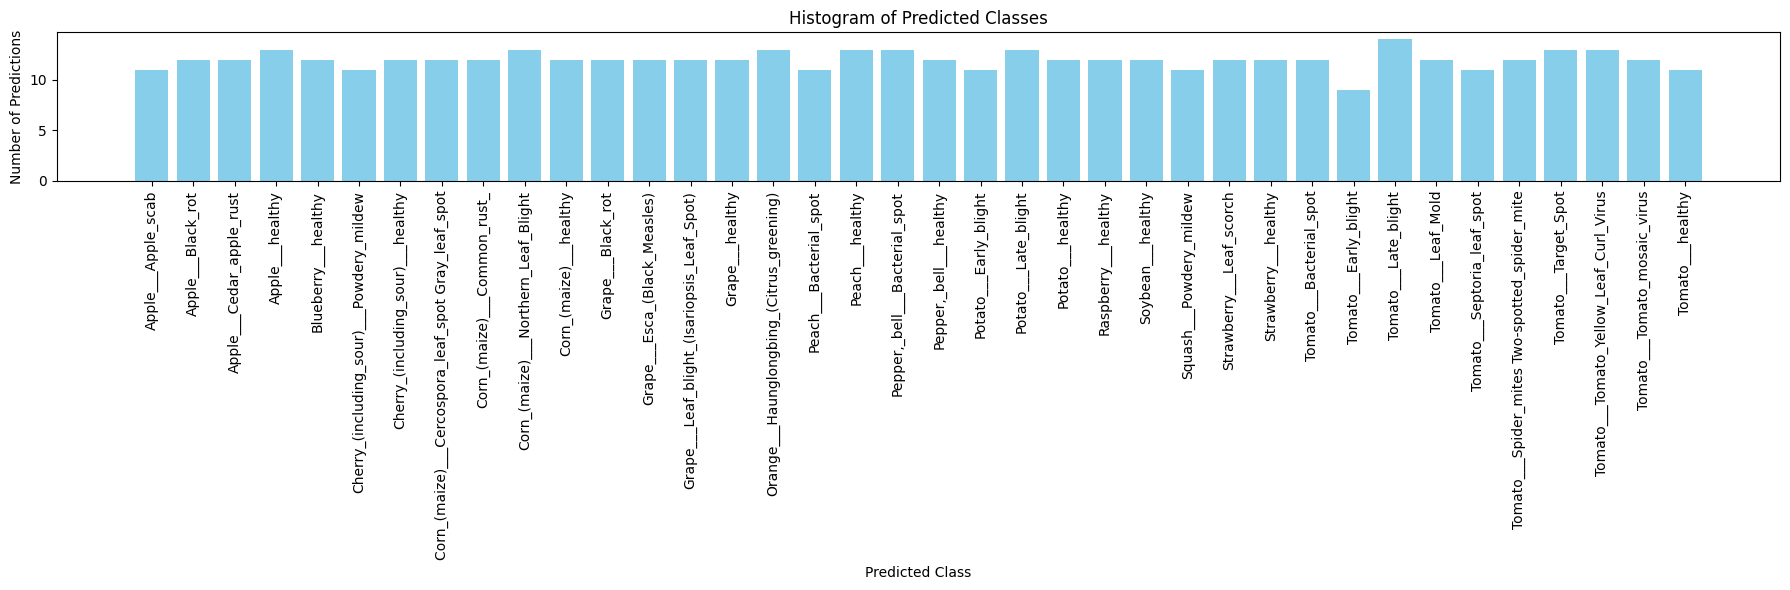

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `y_score` contains predicted probabilities from model.predict
# and `class_name` is the list of class names
predicted_class_indices = np.argmax(y_score, axis=1)

# Count predictions per class
unique, counts = np.unique(predicted_class_indices, return_counts=True)

# Create histogram
plt.figure(figsize=(18, 6))
plt.bar([class_name[i] for i in unique], counts, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Predicted Class')
plt.ylabel('Number of Predictions')
plt.title('Histogram of Predicted Classes')
plt.tight_layout()
plt.show()


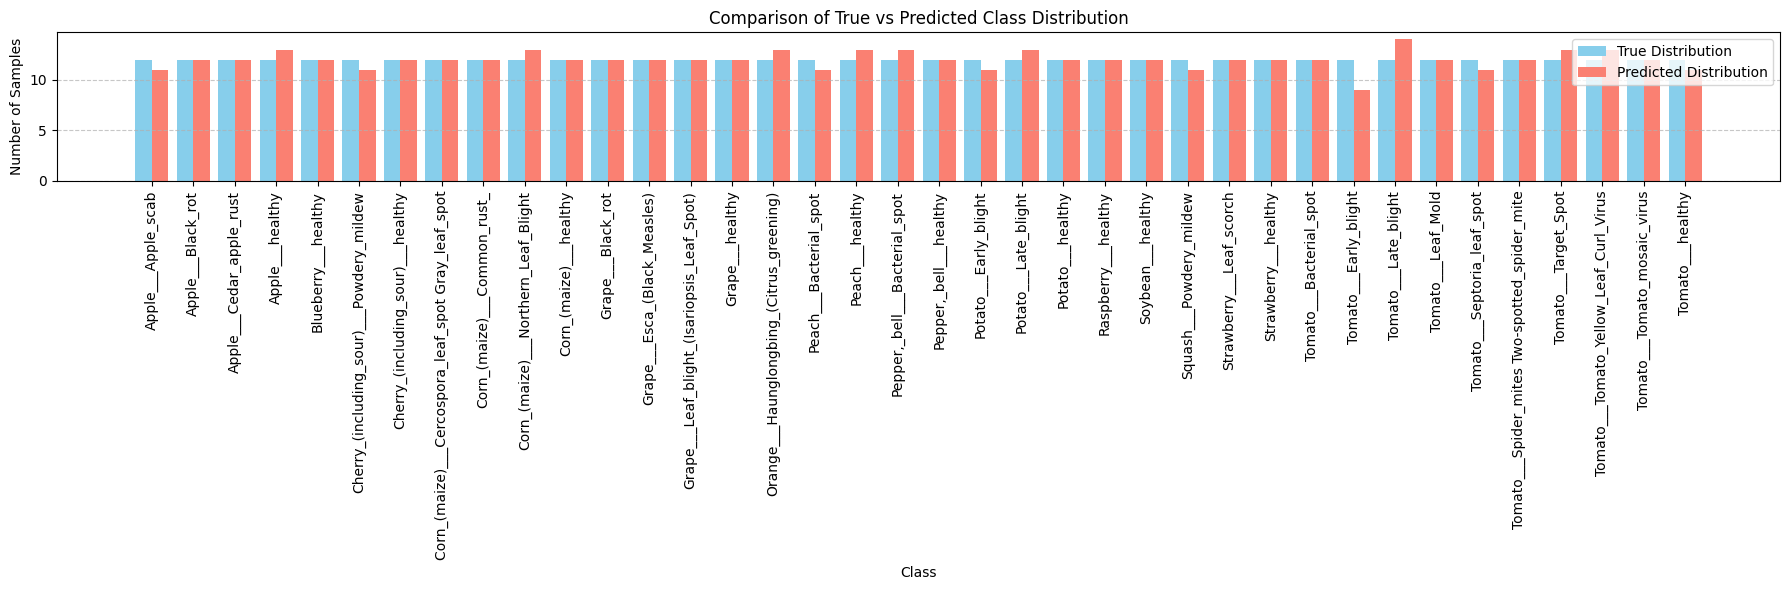

In [34]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Assuming you have these already:
# y_score: predicted probabilities, shape = (num_samples, num_classes)
# y_test: true labels, shape = (num_samples,)
# class_name: list of class names in order  <-- Use this variable

# Get predicted class labels
y_pred = np.argmax(y_score, axis=1)

# Count occurrences
true_counts = Counter(y_test)
pred_counts = Counter(y_pred)

# Align counts with class_name
indices = np.arange(len(class_name))
true_vals = [true_counts.get(i, 0) for i in indices]
pred_vals = [pred_counts.get(i, 0) for i in indices]

# Plot
plt.figure(figsize=(18, 6))
bar_width = 0.4

plt.bar(indices - bar_width/2, true_vals, width=bar_width, label='True Distribution', color='skyblue')
plt.bar(indices + bar_width/2, pred_vals, width=bar_width, label='Predicted Distribution', color='salmon')

plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Comparison of True vs Predicted Class Distribution')
plt.xticks(indices, class_name, rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
